In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
df=  pd.read_csv('/Users/rounaksarkar/Downloads/disease prediction/Training.csv')

In [3]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
df.drop('Unnamed: 133', axis=1, inplace=True)

In [6]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [9]:
df.isnull().sum().sum()

0

In [10]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Relevant features are selected using the feature selection techniques like correlation matrix with heatmap, ExtraTreesRegressor, SelectKBest, mutual_info_classif, chi2, f_classif, RFE, etc.

Feature selection using Random Forest Classifier

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains the 133 columns and y contains the target variable
# Define X and y
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Create a Random Forest Classifier
rfc = RandomForestClassifier()

# Create the RFE object and select 20 features
rfe = RFE(estimator=rfc, n_features_to_select=25, step=1)
rfe.fit(X, y)

# Get the selected feature indices
selected_indices = rfe.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected feature names
print(selected_features.tolist())


['itching', 'skin_rash', 'chills', 'joint_pain', 'stomach_pain', 'vomiting', 'fatigue', 'weight_loss', 'cough', 'high_fever', 'sweating', 'headache', 'nausea', 'loss_of_appetite', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'yellowing_of_eyes', 'malaise', 'chest_pain', 'excessive_hunger', 'muscle_weakness', 'irritability', 'muscle_pain']


Creating a dataframe with the feature names and their importance scores

In [12]:
data= df[selected_features.tolist() + ['prognosis']]

In [13]:
data

,itching,skin_rash,chills,joint_pain,stomach_pain,vomiting,fatigue,weight_loss,cough,high_fever,...,abdominal_pain,diarrhoea,yellowing_of_eyes,malaise,chest_pain,excessive_hunger,muscle_weakness,irritability,muscle_pain,prognosis
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psoriasis


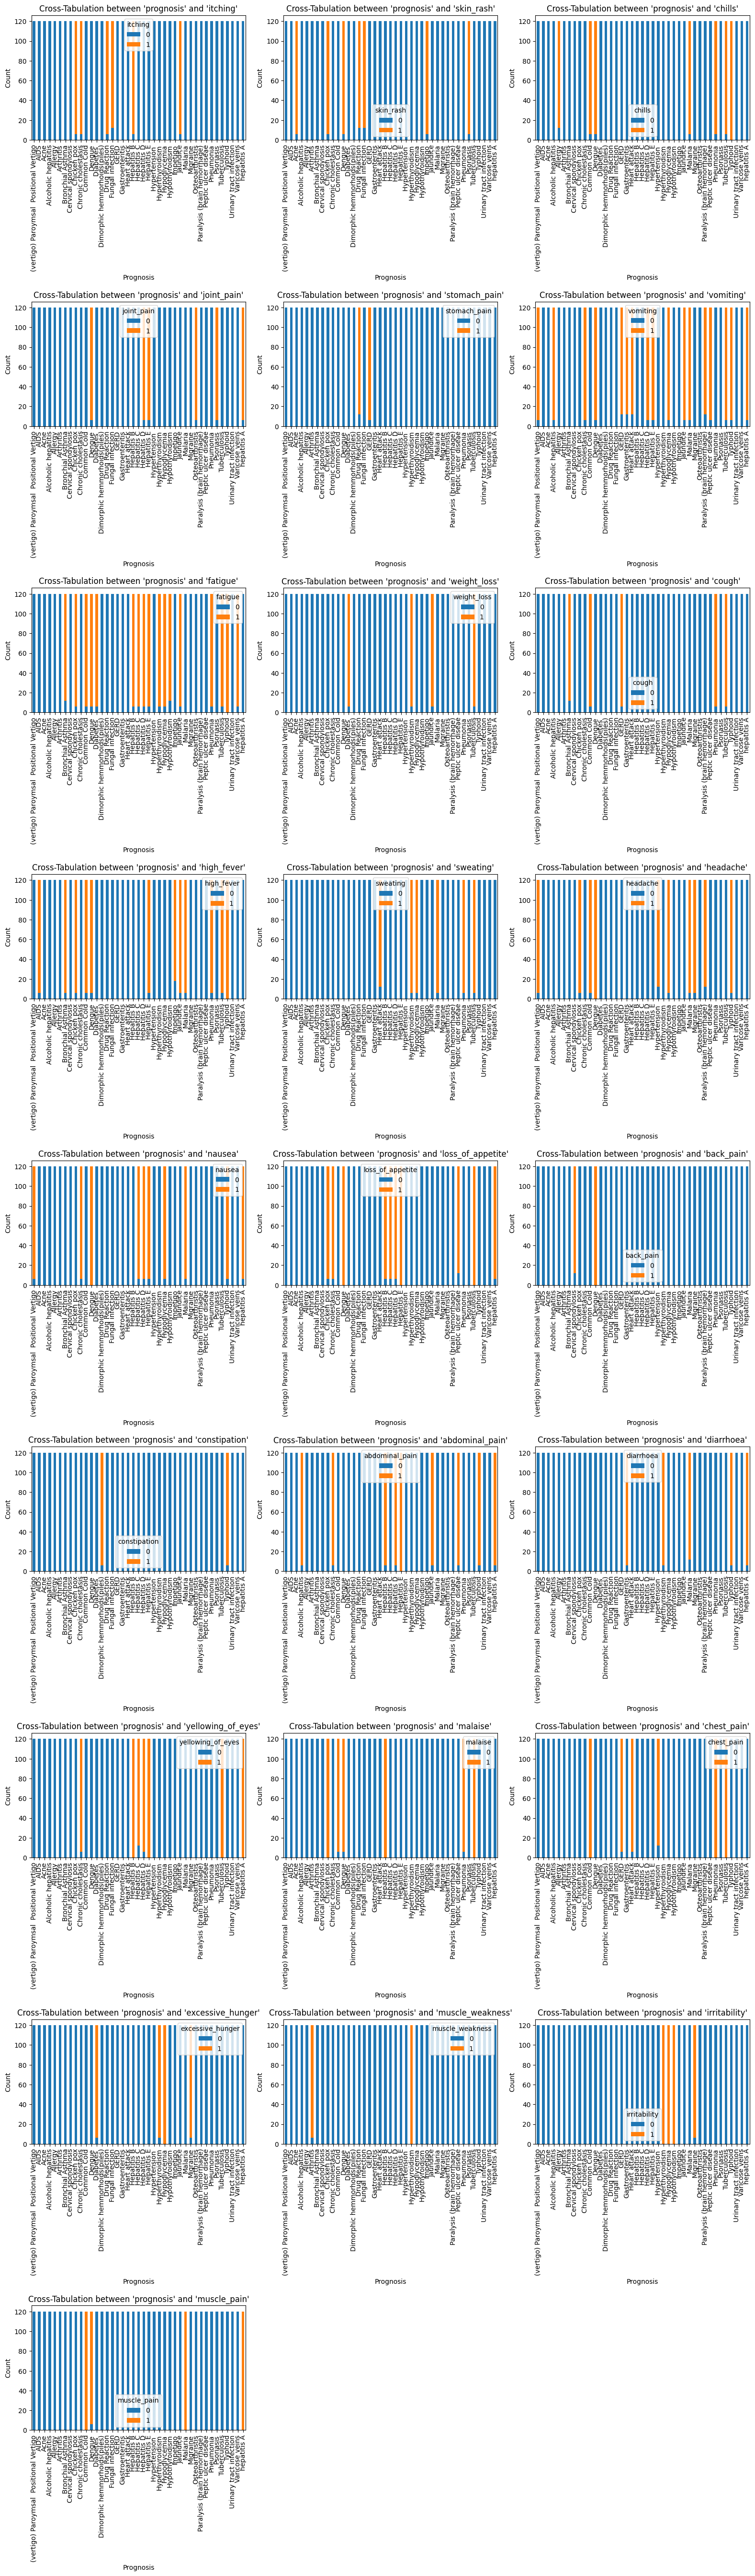

In [14]:
# Get the number of columns (excluding 'prognosis')
num_columns = len(data.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int((num_columns + 2) / 3)  # Adjust the number of rows as needed
num_cols = 3  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * num_rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(data.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(data['prognosis'], data[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()

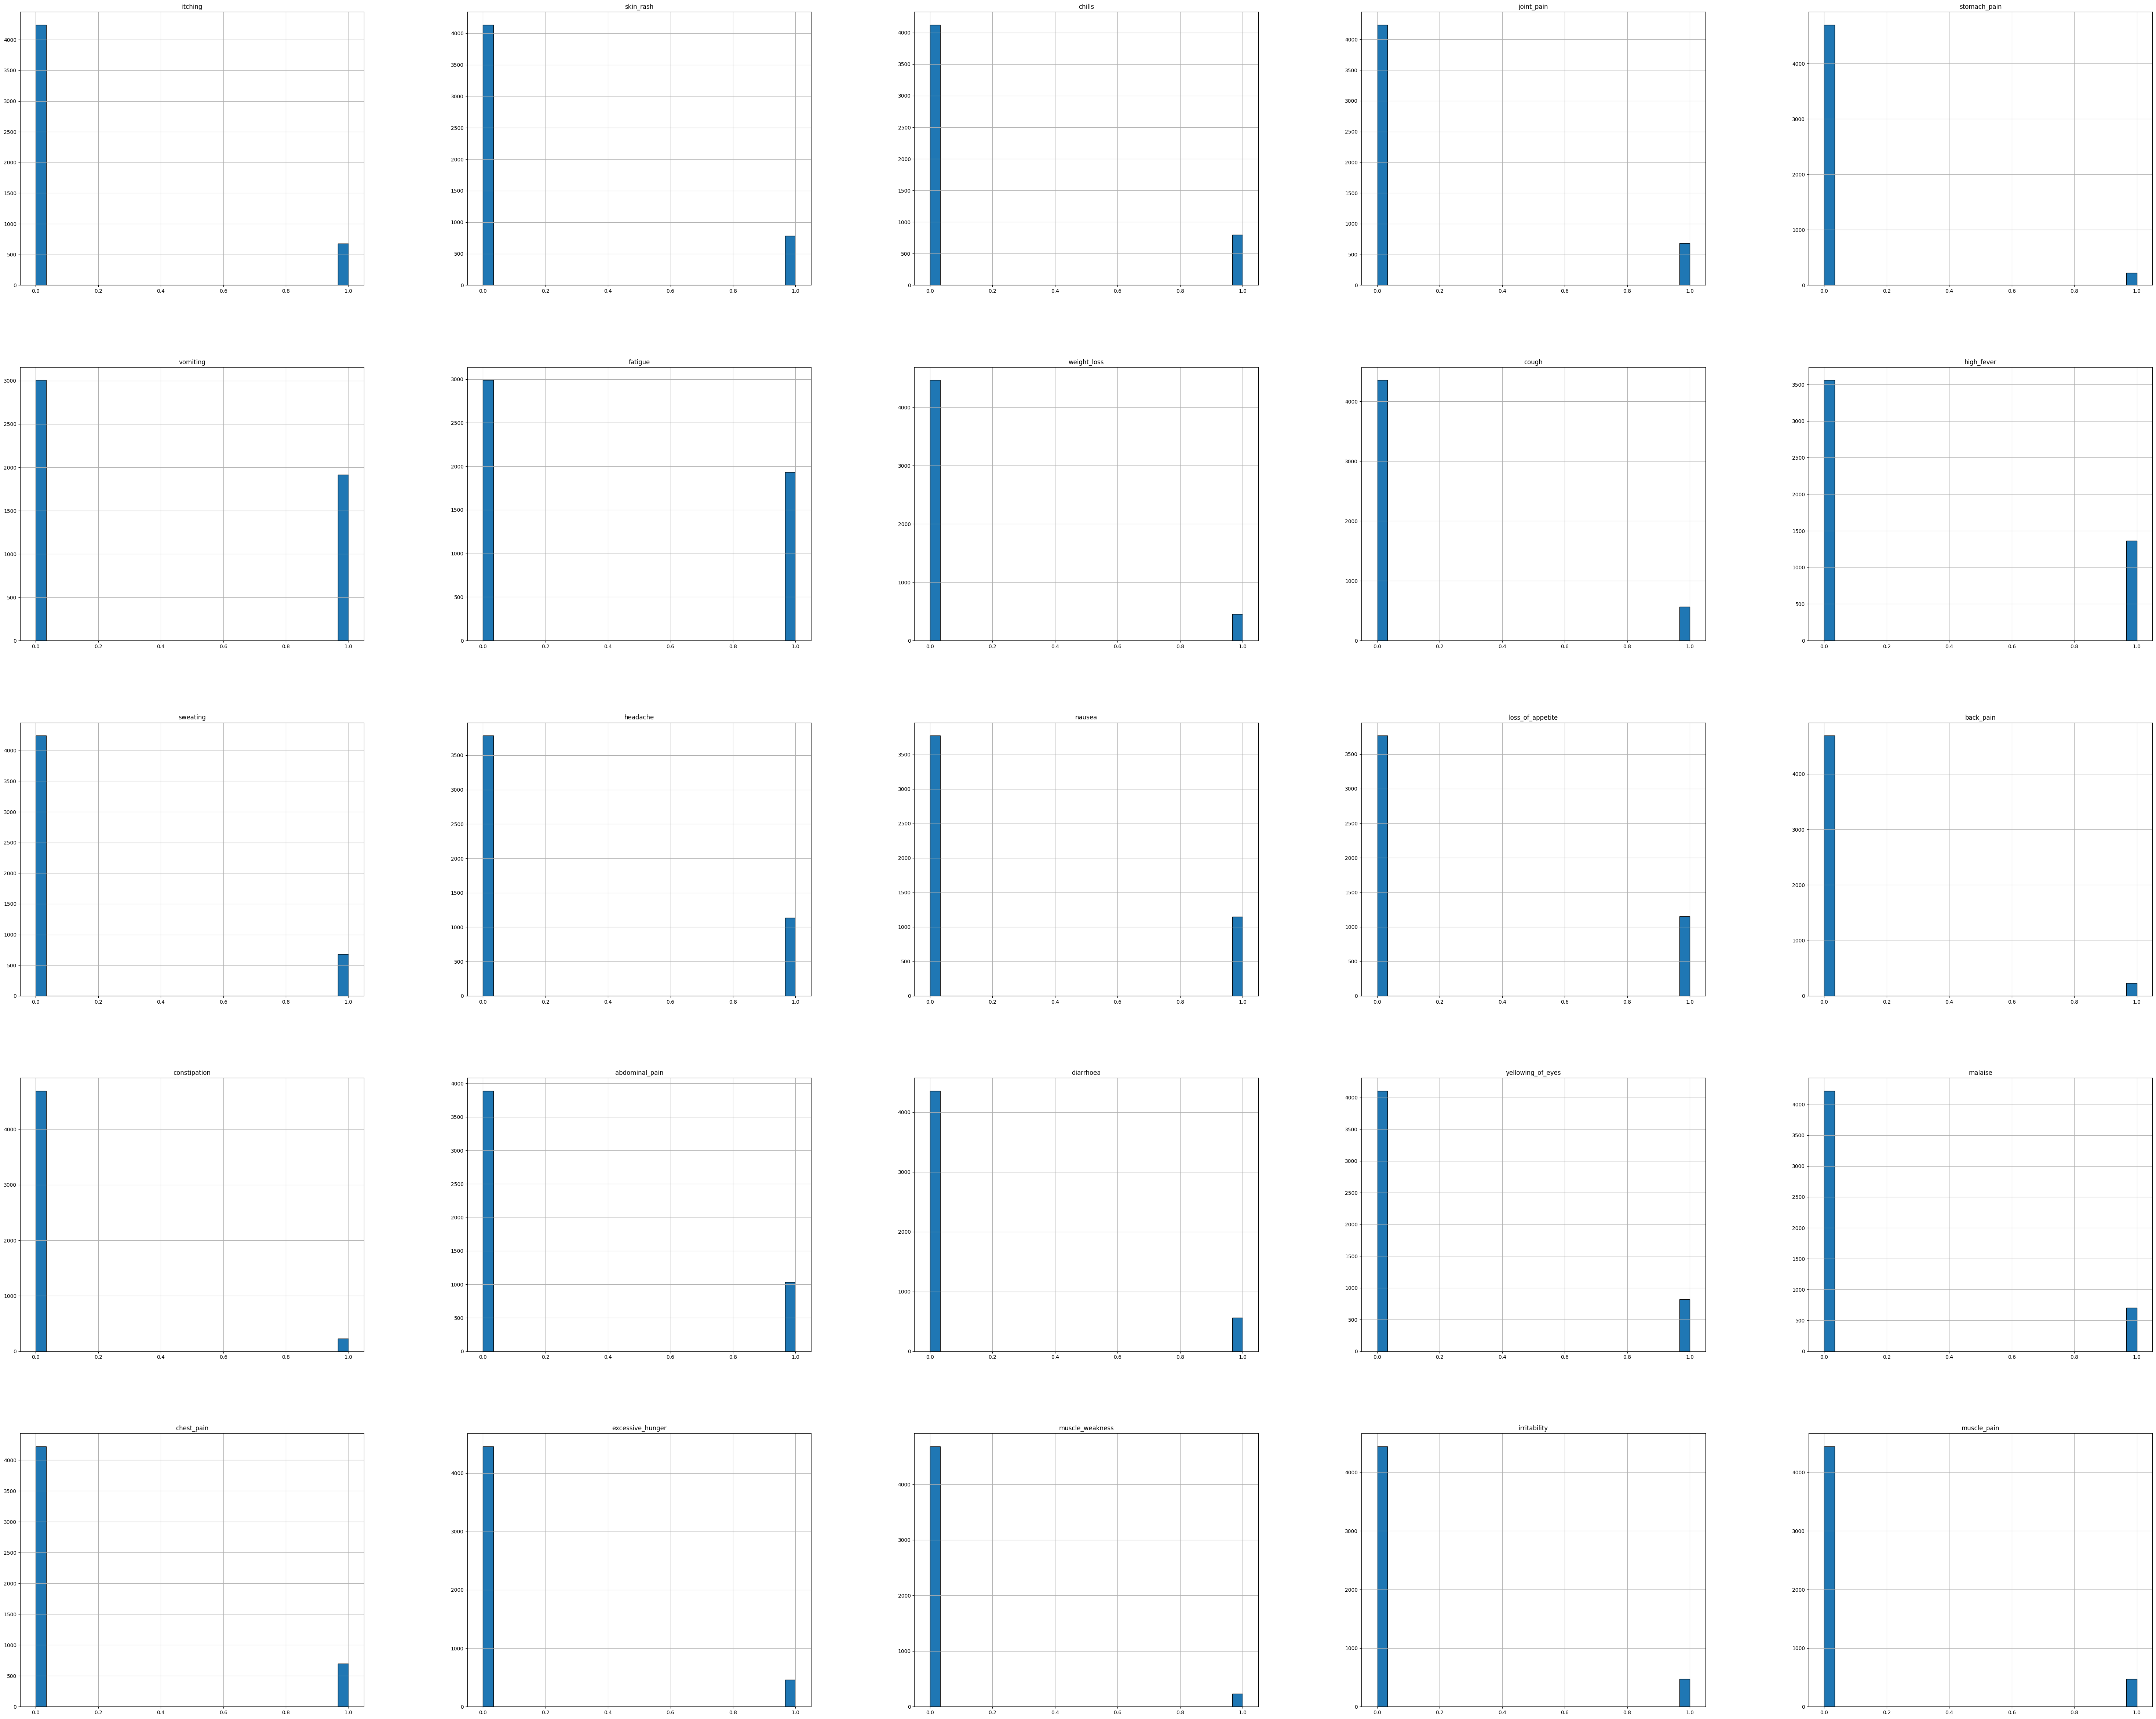

In [15]:
data.hist(figsize=(75,60), bins=30, edgecolor="black")
plt.show()

In [16]:
x = data.drop('prognosis', axis = 1)
y = data['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [17]:
# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(tree_acc * 100))

Decision Tree Classifier:
Accuracy on test set: 95.93%


In [18]:
# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_acc = accuracy_score(y_test, forest_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(forest_acc * 100))

Random Forest Classifier:
Accuracy on test set: 95.93%


In [19]:
# Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_confidence = logreg.predict_proba(x_test)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))

# Print confidence scores for Logistic Regression predictions
print("Confidence scores for Logistic Regression predictions:")
print(logreg_confidence)

Logistic Regression Classifier:
Accuracy on test set: 95.93%
Confidence scores for Logistic Regression predictions:
[[1.41100952e-03 1.31464897e-03 6.24285175e-01 ... 1.88165186e-02
  5.49073610e-03 3.87698692e-04]
 [1.41100952e-03 1.31464897e-03 6.24285175e-01 ... 1.88165186e-02
  5.49073610e-03 3.87698692e-04]
 [4.56989754e-07 6.60691974e-06 3.21838879e-05 ... 3.04990044e-06
  4.66025499e-05 1.75234856e-05]
 ...
 [4.38366402e-04 4.21359378e-04 4.00174759e-04 ... 5.70506032e-04
  1.86489235e-05 2.97793221e-05]
 [8.07377734e-05 3.84672657e-04 1.17013972e-03 ... 1.90960687e-03
  2.72899379e-02 4.91772219e-05]
 [3.81487990e-04 2.99796143e-06 7.60670689e-06 ... 3.69715465e-10
  3.47266736e-06 4.95280166e-04]]


### Saving the file

In [20]:
import pickle

# Assuming we have a logistic regression model named 'logistic_regression_model'

# Save the model to a file using pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg, file)

### Labelling the percentage of the occurrence in the 3 portions - high risk, medium risk and low risk

In [24]:
import numpy as np

# Replace non-numeric values with 0
y = pd.to_numeric(y, errors='coerce')
y = np.nan_to_num(y, nan=0.0)

# Define the criteria for each risk level
high_risk = y >= 0.8
medium_risk = (y >= 0.5) & (y < 0.8)
low_risk = y < 0.5

# Label the samples based on their risk level
df['risk_level'] = pd.cut(y, bins=[-float('inf'), 0.5, 0.8, float('inf')], labels=['low', 'medium', 'high'])

# Calculate the percentage of samples in each risk level
risk_counts = df['risk_level'].value_counts(normalize=True) * 100

# Print the percentage of samples in each risk level
print(f"High risk: {risk_counts['high']:.2f}%")
print(f"Medium risk: {risk_counts['medium']:.2f}%")
print(f"Low risk: {risk_counts['low']:.2f}%")

High risk: 0.00%
Medium risk: 0.00%
Low risk: 100.00%


In [25]:
# Finding the label of riskness for each patient

# Supriyo 
z_Supriyo= [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1]
z_Supriyo_reshaped= np.array(z_Supriyo).reshape(1,-1)
prediction= logreg.predict(z_Supriyo_reshaped)
print(prediction)
z_Supriyo_dataframe= pd.DataFrame(z_Supriyo_reshaped, columns= x.columns)
probability_Supriyo= logreg.predict_proba(z_Supriyo_dataframe)[:,1]
print(f"The probability of the patient having the disease is {(probability_Supriyo[0])*100:.2f}%")
probability_of_occurrence= probability_Supriyo[0]
if probability_of_occurrence >= 0.8:
    print(f"The patient is at high risk of having { prediction}")
elif probability_of_occurrence >= 0.5 and probability_of_occurrence < 0.8:
    print(f"The patient is at medium risk of having { prediction}")
else:
    print(f"The patient is at low risk of having{ prediction}")


['AIDS']
The probability of the patient having the disease is 44.65%
The patient is at low risk of having['AIDS']


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
z_Subhrajit= [1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1]
z_Subhrajit_reshaped= np.array(z_Subhrajit).reshape(1,-1)
prediction= logreg.predict(z_Subhrajit_reshaped)
print(prediction)
z_Subhrajit_dataframe= pd.DataFrame(z_Subhrajit_reshaped, columns= x.columns)
probability_Subhrajit= logreg.predict_proba(z_Subhrajit_dataframe)[:,1]
print(f"The probability of the patient having the disease is {(probability_Subhrajit[0])*100:.2f}%")
probability_of_occurrence= probability_Subhrajit[0]
if probability_of_occurrence >= 0.8:
    print(f"The patient is at high risk of having { prediction}")
elif probability_of_occurrence >= 0.5 and probability_of_occurrence < 0.8:
    print(f"The patient is at medium risk of having { prediction}")
else:
    print(f"The patient is at low risk of having{ prediction}")

['Migraine']
The probability of the patient having the disease is 0.00%
The patient is at low risk of having['Migraine']


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
z_antara= [0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0]
z_antara_reshaped= np.array(z_antara).reshape(1,-1)
prediction= logreg.predict(z_antara_reshaped)
print(prediction)
z_antara_dataframe= pd.DataFrame(z_antara_reshaped, columns= x.columns)
probability_antara= logreg.predict_proba(z_antara_dataframe)[:,1]
print(f"The probability of the patient having the disease is {(probability_antara[0])*100:.2f}%")
probability_of_occurrence= probability_antara[0]
if probability_of_occurrence >= 0.8:
    print(f"The patient is at high risk of having { prediction}")
elif probability_of_occurrence >= 0.5 and probability_of_occurrence < 0.8:
    print(f"The patient is at medium risk of having { prediction}")
else:
    print(f"The patient is at low risk of having{ prediction}")

['Heart attack']
The probability of the patient having the disease is 1.98%
The patient is at low risk of having['Heart attack']


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
